<a href="https://colab.research.google.com/github/sushmagowda94/capstone-project1-hotel-booking-analysis/blob/main/individual_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                             ***INTRODUCTION***


We are here to explore a hotel booking data set to discover important factors that govern the bookings. This data set contains booking information for a city and a resort hotel and include information such as when the booking was made, length of stay, the number of adults, children/babies and the number of available parking spaces among other things.

we will analyse some important aspects of hotel booking which will help us identify major loopholes and give us insights which will be helpful to run profitable hotel business.                     




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing required libraries
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
%matplotlib inline
from collections import Counter
import plotly.express as px 

In [ ]:
path = "/content/drive/MyDrive/Hotel Bookings.csv"

In [ ]:
#reading data
df_hotelbooking = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [ ]:
df_hotelbooking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [ ]:
df_hotelbooking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df_hotelbooking.shape

(119390, 32)

In [ ]:
#finding missing values
df_hotelbooking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we have four columns with missing values here, for the null values in agent and company column we will replace it with zero and Children column contains the count of children, so we will replace all the missing values with the rounded mean value. And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

---





In [ ]:
df_hotelbooking[['agent','company']] = df_hotelbooking[['agent','company']].fillna(0.0)
df_hotelbooking['country'].fillna(df_hotelbooking.country.mode().to_string(), inplace=True)
df_hotelbooking['children'].fillna(round(df_hotelbooking.children.mean()), inplace=True)



In [ ]:
df_hotelbooking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#removing the rows which have zero guests
df_hotelbooking[(df_hotelbooking.adults+df_hotelbooking.children+df_hotelbooking.babies)==0].shape
data = df_hotelbooking.drop(df_hotelbooking[(df_hotelbooking.adults+df_hotelbooking.babies+df_hotelbooking.children)==0].index)

In [ ]:
data.shape

(119210, 32)

In [ ]:
#check the data type of each column
df_hotelbooking.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

there are different datatype for different column, There are some columns like children, company, and agent, that are float type but their values are only in integers.

So we will convert them to the integer type.

In [ ]:
df_hotelbooking[['children', 'company', 'agent']] = df_hotelbooking[['children', 'company', 'agent']].astype('int64')


## Let's do data analysis and visualisation

**1.top 5 countries from where most guests are coming.**

In [ ]:
print(Counter(df_hotelbooking['country'].values))

Counter({'PRT': 48590, 'GBR': 12129, 'FRA': 10415, 'ESP': 8568, 'DEU': 7287, 'ITA': 3766, 'IRL': 3375, 'BEL': 2342, 'BRA': 2224, 'NLD': 2104, 'USA': 2097, 'CHE': 1730, 'CN': 1279, 'AUT': 1263, 'SWE': 1024, 'CHN': 999, 'POL': 919, 'ISR': 669, 'RUS': 632, 'NOR': 607, 'ROU': 500, '0    PRT': 488, 'FIN': 447, 'DNK': 435, 'AUS': 426, 'AGO': 362, 'LUX': 287, 'MAR': 259, 'TUR': 248, 'HUN': 230, 'ARG': 214, 'JPN': 197, 'CZE': 171, 'IND': 152, 'KOR': 133, 'GRC': 128, 'DZA': 103, 'SRB': 101, 'HRV': 100, 'MEX': 85, 'EST': 83, 'IRN': 83, 'LTU': 81, 'ZAF': 80, 'BGR': 75, 'NZL': 74, 'COL': 71, 'UKR': 68, 'MOZ': 67, 'CHL': 65, 'SVK': 65, 'THA': 59, 'SVN': 57, 'ISL': 57, 'LVA': 55, 'ARE': 51, 'CYP': 51, 'TWN': 51, 'SAU': 48, 'PHL': 40, 'TUN': 39, 'SGP': 39, 'IDN': 35, 'NGA': 34, 'URY': 32, 'EGY': 32, 'LBN': 31, 'HKG': 29, 'PER': 29, 'MYS': 28, 'ECU': 27, 'BLR': 26, 'VEN': 26, 'CPV': 24, 'GEO': 22, 'JOR': 21, 'CRI': 19, 'KAZ': 19, 'OMN': 18, 'GIB': 18, 'MLT': 18, 'AZE': 17, 'KWT': 16, 'MAC': 16, 'QAT':

In [ ]:
print(Counter(df_hotelbooking['country'].values).most_common(5))

[('PRT', 48590), ('GBR', 12129), ('FRA', 10415), ('ESP', 8568), ('DEU', 7287)]


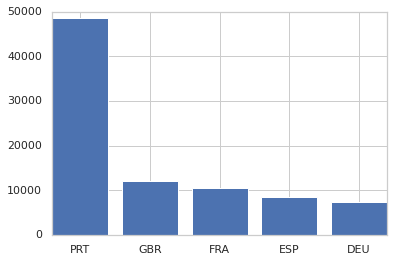

In [ ]:
import matplotlib.pyplot as plt
bar_plot = dict(Counter(df_hotelbooking['country'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.show()


*   These are some of the top 5 countries which have most number of guests. as we can see most guests are from portugal, UK, France, spain and other European countries.




**2.now let's find out which hotel has the more cancellation**

As we can imagine, the cancellation rate for bookings in the online booking industry is quite high. Once the reservation has been cancelled, there is almost nothing to be done. This creates discomfort for many institutions and creates a desire to take precautions. Therefore, predicting reservations that can be cancelled and preventing these cancellations will create a surplus value for the institutions.

In [ ]:
non_cancelled_reservations_data = data[data['is_canceled'] == 0]
non_cancelled_reservations_data.shape

(75011, 32)

In [ ]:
non_cancelled_reservations_data['Total Guests'] = non_cancelled_reservations_data['adults'] + non_cancelled_reservations_data['children'] + non_cancelled_reservations_data['babies']

In [ ]:
data = data[data['adr'] > 0.00]
non_cancelled_reservations_data['price_per_guest'] = non_cancelled_reservations_data['adr']/(non_cancelled_reservations_data['adults'] + non_cancelled_reservations_data['children'] + non_cancelled_reservations_data['babies'])

In [ ]:
non_cancelled_reservations_data['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
px.histogram (data, x = "hotel", color = 'is_canceled')


*  The first thing we want to see is the distribution of reservations cancelled and not cancelled. In the image below we can see that we have data from a Resort Hotel and City hotel, The first thing we conclude is that there are more cancellations in the City hotel.




**3.which is the busiest month of the year?**

---



In [ ]:
bookings_count_data = pd.DataFrame(non_cancelled_reservations_data.groupby(['arrival_date_year', 'arrival_date_month']).hotel.count())
bookings_count_data.reset_index(inplace = True)

In [ ]:
results = bookings_count_data.pivot('arrival_date_year', 'arrival_date_month','hotel')

In [ ]:
results = results.fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
results = results.reindex(columns = months)

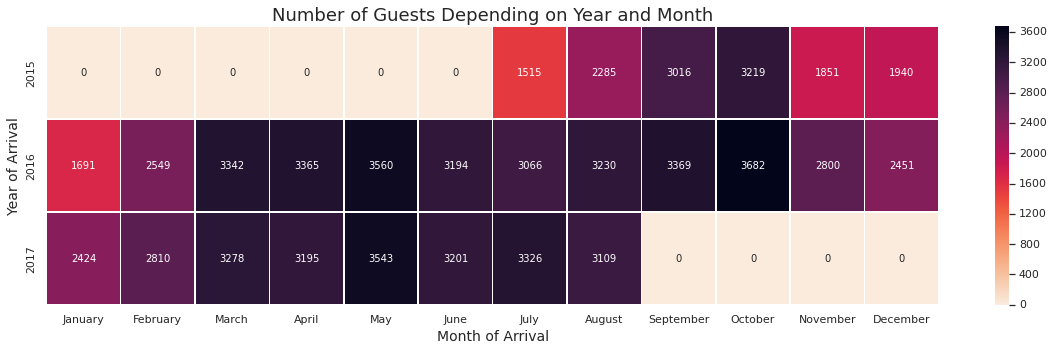

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(results, 
            annot = True, 
            fmt = "0.0f", 
            linewidths = .5, 
            cmap = 'rocket_r')
plt.xlabel('Month of Arrival', fontsize = 14)
plt.ylabel('Year of Arrival', fontsize = 14)
plt.title('Number of Guests Depending on Year and Month', fontsize = 18);

As we can see in the chart here August month is the most busiest month of the year followed by July

**4.now let's see how many bookings were cancelled**

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays

x is our unique values
y is the percentage value of each unique value

Now let’s use this function on our is_canceled feature and see the result

In [ ]:
x,y = get_count(data['is_canceled'])
x,y

(array([0, 1]), array([62.51160572, 37.48839428]))

'is_canceled' have two unique values: 
1 if booking got canceled, else 0.
Now let’s plot this result. I will write another function to plot the diagram. 

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

This function takes two arrays, x, and y and displays the required diagram. The default plot type is a bar plot, but it can also plot the line plot. Optional arguments can be given to display title and labels.

Now let’s call the function

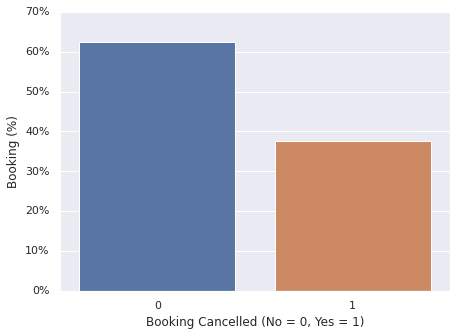

In [ ]:
import matplotlib.ticker as mtick
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking )
 


**5.What is the booking ratio between Resort Hotel and City Hotel?**

Let’s answer another question, how many bookings were made for each type of hotel.

We can now reuse the functions that we created earlier. All we have to do is to pass the dataframe column to get_count() function and pass its result (x and y array) to plot function.

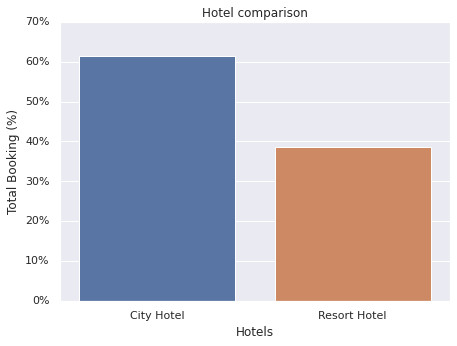

In [ ]:
data_not_canceled = df_hotelbooking[df_hotelbooking['is_canceled'] == 0]
x,y = get_count(data_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

 More than 60% of the population booked the City hotel, From the pie chart above we can see that two thirds of bookers chose the city hotel option.





**6. What is the percentage of booking for each year?**

In [ ]:
#Find unique values
df_hotelbooking['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
#Count Values present in column
yearly_count_hotel=df_hotelbooking['arrival_date_year'].value_counts()
yearly_count_hotel

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

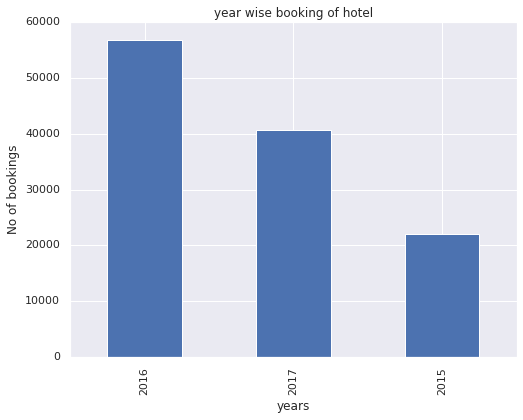

In [ ]:
#Determine size for figure
plt.figure(figsize=(8,6))

##Analysis by using plot bar 
yearly_count_hotel.plot.bar()
plt.xlabel('years')
plt.ylabel('No of bookings')
plt.title('year wise booking of hotel')
plt.show()

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

# **conclusion**

1.   It seems like close to 40% of the reservations were canceled. This is a pretty high number!


2.   most of the customers prefer city hotel over resort hotel


3.   there is a high demand for booking in August and july month

4.   most guests are from Europre since it is summer season in europe countries in July and August
5.   As per the data it seems like 2016 is the most demanding year for hotel bookings. 




